### Importing libraries

In [1]:
import os
import h5py
import torch
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Load data

In [2]:
if os.getlogin() == 'johandybkjaer-knudsen':
    file_dir = '/Volumes/U/G2.h5'
elif os.getlogin() == 'suneetsingh':
    file_dir = '/Volumes/VERBATIM HD/Deep learning data/G2.h5'
    
data = h5py.File(file_dir, 'r')

### Get overview of data

In [3]:
# Data structure
print("The data contains the following folders: {}".format(list(data.keys())))
print('Shape "b_": {}'.format(data['b_'].shape))
print('Shape "ih": {}'.format(data['ih'].shape))
print('Shape "ih_mean": {}'.format(data['ih_mean'].shape))

The data contains the following folders: ['b_', 'ih', 'ih_mean']
Shape "b_": (78979, 1, 128, 128)
Shape "ih": (78979, 3, 128, 128)
Shape "ih_mean": (3, 128, 128)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


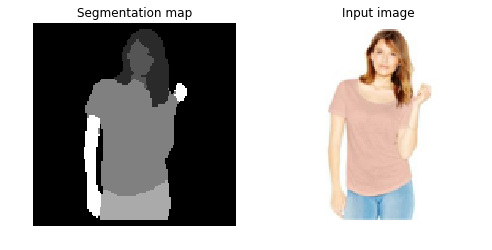

In [58]:
# ----- Plot example of data -----
randNum = np.random.randint(len(data['ih']))
img_mean = data['ih_mean']

# Example of grey-scale image
img_grey = data['b_'][randNum][0].T

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.title('Segmentation map')
plt.axis('off')
plt.imshow(img_grey, cmap='gray')

# Example of color image
img_color = data['ih'][randNum] + img_mean
img_color = img_color.T
img_color = torch.from_numpy(img_color)

plt.subplot(122)
plt.title('Input image')
plt.axis('off')
plt.imshow(img_color)

plt.show()

### Information retrievel

In [59]:
# Height
def findHeight(image):
    a = np.argmax(image, 1)
    a = np.trim_zeros(a)
    return len(a)

# Width 
def findWidth(image):
    a = np.argmax(image, 0)
    a = np.trim_zeros(a)
    return len(a)

# Width to height ratio
def ratio(image):
    return findWidth(image)/findHeight(image)

# Long hair
def hasLongHair(image):
    # Hair segmentation map
    hair = np.where(image != 1, 0, image)
    
    # Torso segmentation map
    torso = np.where(image != 3, 0, image)
    
    # Lowest pixel of hair
    hair_low = np.argmax(hair, 1)
    hair_low = np.argwhere(hair_low != 0)
    hair_low = hair_low[-1]
    
    # Highest pixel of torso
    torso_high = np.argmax(torso, 1)
    torso_high = np.argwhere(torso_high != 0)
    torso_high = torso_high[0]
    
    # Has long hair
    if hair_low < torso_high:
        hasLongHair = 0
    else:
        hasLongHair = 1
    return hasLongHair

def RGB_Y_mean(colorImage):
    # Mean colors
    R_mean = colorImage[0].mean()
    G_mean = colorImage[1].mean()
    B_mean = colorImage[2].mean()
    Y_mean = colorImage.mean()
    
    return R_mean, G_mean, B_mean, Y_mean

def informationVector(img_ID): # Skal jeg loade hele datasættet op også?
    # Get image from ID
    segment_IMG = data['b_'][img_ID][0].T
    img_mean = data['ih_mean']
    color_IMG = data['ih'][img_ID] + img_mean
    
    R_mean, G_mean, B_mean, Y_mean = RGB_Y_mean(color_IMG)
    
    vect = np.array([findHeight(segment_IMG), findWidth(segment_IMG), ratio(segment_IMG), \
                     hasLongHair(segment_IMG), R_mean, G_mean, B_mean, Y_mean])
    return vect

In [60]:
info = informationVector(randNum)
print("Height: {}".format(info[0]))
print("Width: {}".format(info[1]))
print("Body ratio: {}".format(info[2]))
print("Has long hair: {}".format(bool(info[3])))
print("Mean R color: {}".format(info[4]))
print("Mean G color: {}".format(info[5]))
print("Mean B color: {}".format(info[6]))
print("Mean overall color: {}".format(info[7]))

Height: 120.0
Width: 65.0
Body ratio: 0.5416666666666666
Has long hair: True
Mean R color: 0.944562554359436
Mean G color: 0.9080742597579956
Mean B color: 0.8855329751968384
Mean overall color: 0.9127232432365417
